# Weather Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

In [2]:
weather = pd.read_csv('./cleaned_weatherdata/weather_CLEAN.csv')

In [3]:
weather.shape

(95053, 23)

In [4]:
#Adding date column
weather['Date'] = pd.to_datetime(weather.Year*10000+weather.Month*100+weather.Day,format='%Y%m%d')

In [5]:
weather.columns

Index(['Location', 'Lat', 'Lon', 'Year', 'Month', 'Day',
       'PrecipPastHour(cm)_min', 'PrecipPastHour(cm)_max',
       'PrecipPastHour(cm)_avg', 'PrecipPastHour(cm)_sum', 'Runoff(mm)_min',
       'Runoff(mm)_max', 'Runoff(mm)_avg', 'Runoff(mm)_sum',
       'Soil Moisture%(0-10)_min', 'Soil Moisture%(0-10)_max',
       'Soil Moisture%(0-10)_avg', 'Soil Moisture% (10-40)_min',
       'Soil Moisture% (10-40)_max', 'Soil Moisture% (10-40)_avg',
       'Soil Moisture% (40-100)_min', 'Soil Moisture% (40-100)_max',
       'Soil Moisture% (40-100)_avg', 'Date'],
      dtype='object')

In [6]:
weather.drop_duplicates(keep='first',inplace=True) 

In [7]:
weather.shape

(95032, 24)

In [8]:
# Converting to a time-series database
weather = weather.set_index('Date')

In [9]:
weather.Location.unique()

array(['Amritsar', 'Barnala', 'Bathinda', 'Faridkot', 'Fatehgarh Sahib',
       'Fazilka', 'Ferozepur', 'Gurdaspur', 'Hoshiarpur', 'Kapurthala',
       'Ludhiana', 'Mansa', 'Moga', 'Pathankot', 'Patiala', 'Roopnagar',
       'Sangrur', 'SAS Nagar', 'SBS Nagar', 'Sri Muktsar Sahib',
       'Tarn Taran', 'Jalandhar'], dtype=object)

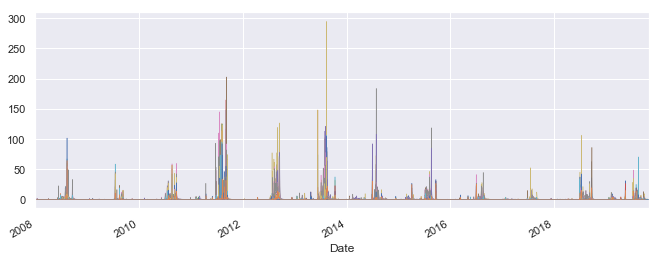

In [10]:
sns.set(rc={'figure.figsize':(11, 4)})
weather.groupby(['Location'])['Runoff(mm)_sum'].plot(linewidth=0.5);

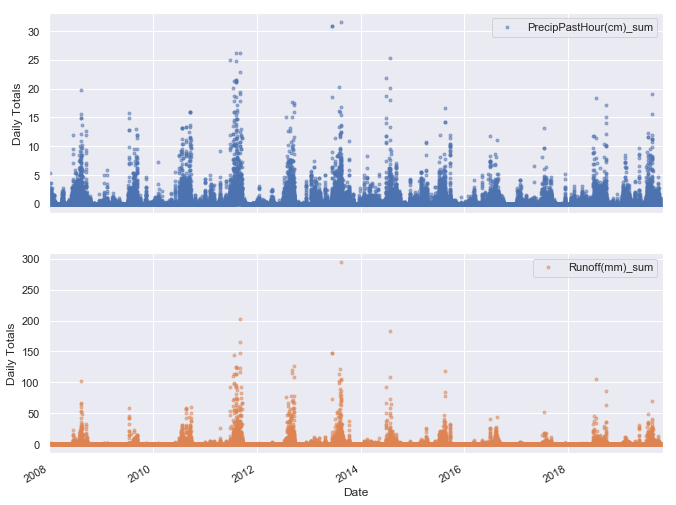

In [11]:
cols_plot = ['PrecipPastHour(cm)_sum', 'Runoff(mm)_sum']
axes = weather[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

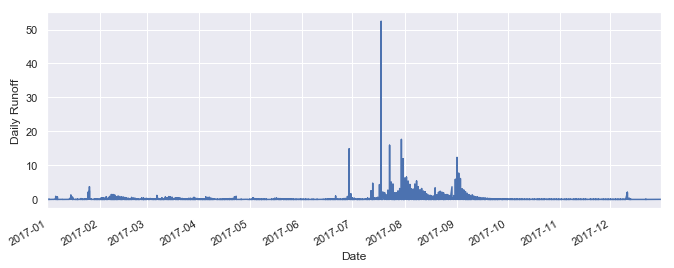

In [12]:
ax = weather.loc['2017', 'Runoff(mm)_sum'].plot()
ax.set_ylabel('Daily Runoff');

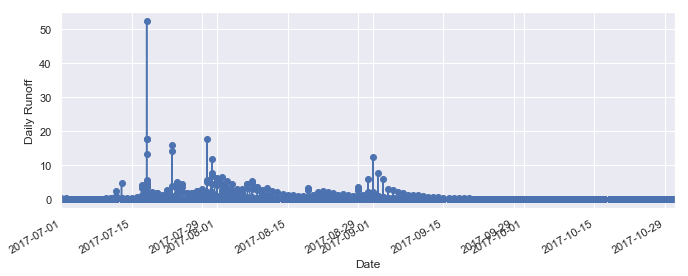

In [13]:
ax = weather.loc['2017-07':'2017-10', 'Runoff(mm)_sum'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Runoff');

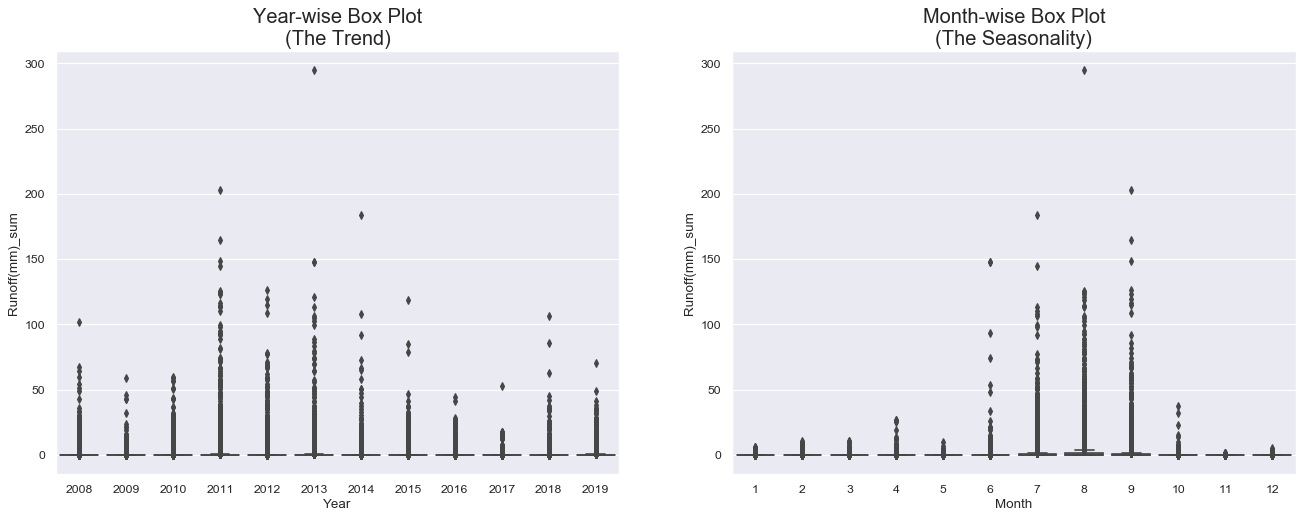

In [14]:
years = weather['Year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Runoff(mm)_sum', data=weather, ax=axes[0])
sns.boxplot(x='Month', y='Runoff(mm)_sum', data=weather.loc[~weather['Year'].isin([2008, 2019]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [15]:
weather_lite = pd.DataFrame(weather[['Location','PrecipPastHour(cm)_sum','Runoff(mm)_sum']])

In [16]:
weather_lite.Location.unique()

array(['Amritsar', 'Barnala', 'Bathinda', 'Faridkot', 'Fatehgarh Sahib',
       'Fazilka', 'Ferozepur', 'Gurdaspur', 'Hoshiarpur', 'Kapurthala',
       'Ludhiana', 'Mansa', 'Moga', 'Pathankot', 'Patiala', 'Roopnagar',
       'Sangrur', 'SAS Nagar', 'SBS Nagar', 'Sri Muktsar Sahib',
       'Tarn Taran', 'Jalandhar'], dtype=object)

In [17]:
weather_lite.head(50000).tail(100)

,Location,PrecipPastHour(cm)_sum,Runoff(mm)_sum
Date,,,
2015-09-07,Moga,0.00000,0.0000
2015-09-08,Moga,0.00000,0.0000
2015-09-09,Moga,0.00000,0.0000
2015-09-10,Moga,0.00000,0.0000
2015-09-11,Moga,0.00000,0.0000
...,...,...,...
2015-12-11,Moga,0.00254,0.0059
2015-12-12,Moga,0.00000,0.0000
2015-12-13,Moga,0.00000,0.0000


In [18]:
weather_lite = weather_lite.rename(columns={'PrecipPastHour(cm)_sum':'Precip','Runoff(mm)_sum':'Runoff'})

In [19]:
weather_lite = weather_lite.sort_index()
weather_lite.Location.unique()

array(['Jalandhar', 'Pathankot', 'Gurdaspur', 'Fazilka', 'SAS Nagar',
       'Roopnagar', 'Ferozepur', 'Amritsar', 'Sri Muktsar Sahib', 'Moga',
       'Sangrur', 'Bathinda', 'Tarn Taran', 'Kapurthala', 'Ludhiana',
       'Mansa', 'Hoshiarpur', 'Barnala', 'Faridkot', 'Fatehgarh Sahib',
       'SBS Nagar', 'Patiala'], dtype=object)

In [20]:
#Engineering features Precip & Runoff (previous 3 days, previous week, previous month, previous four months)
pivoted_df = pd.pivot_table(weather_lite, index='Date', columns='Location', values='Precip')
precip_3 = pivoted_df.rolling(window=3).sum().stack().reset_index()
precip_7 = pivoted_df.rolling(window=7).sum().stack().reset_index()
precip_30 = pivoted_df.rolling(window=30).sum().stack().reset_index()
precip_120 = pivoted_df.rolling(window=120).sum().stack().reset_index()
pivoted_df2 = pd.pivot_table(weather_lite, index='Date', columns='Location', values='Runoff')
runoff_3 = pivoted_df2.rolling(window=3).sum().stack().reset_index()
runoff_7 = pivoted_df2.rolling(window=7).sum().stack().reset_index()
runoff_30 = pivoted_df2.rolling(window=30).sum().stack().reset_index()
runoff_120 = pivoted_df2.rolling(window=120).sum().stack().reset_index()

In [21]:
#Rename all columns to prep for merging
precip_3.columns = ['Date','Location','Precip_3']
precip_7.columns = ['Date','Location','Precip_7']
precip_30.columns = ['Date','Location','Precip_30']
precip_120.columns = ['Date','Location','Precip_120']
runoff_3.columns = ['Date','Location','Runoff_3']
runoff_7.columns = ['Date','Location','Runoff_7']
runoff_30.columns = ['Date','Location','Runoff_30']
runoff_120.columns = ['Date','Location','Runoff_120']

In [22]:
#Merging all together
temp = pd.merge(precip_3, precip_7, on = ['Date','Location'], how = "left")
temp = pd.merge(temp, precip_30, on = ['Date','Location'], how = "left")
temp = pd.merge(temp, precip_120, on = ['Date','Location'], how = "left")
temp = pd.merge(temp, runoff_3, on = ['Date','Location'], how = "left")
temp = pd.merge(temp, runoff_7, on = ['Date','Location'], how = "left")
temp = pd.merge(temp, runoff_30, on = ['Date','Location'], how = "left")
temp = pd.merge(temp, runoff_120, on = ['Date','Location'], how = "left")

In [23]:
weather_lite = pd.merge(weather_lite, temp, on = ['Date','Location'], how = "left")

In [24]:
weather_lite.Location.unique()

array(['Jalandhar', 'Pathankot', 'Gurdaspur', 'Fazilka', 'SAS Nagar',
       'Roopnagar', 'Ferozepur', 'Amritsar', 'Sri Muktsar Sahib', 'Moga',
       'Sangrur', 'Bathinda', 'Tarn Taran', 'Kapurthala', 'Ludhiana',
       'Mansa', 'Hoshiarpur', 'Barnala', 'Faridkot', 'Fatehgarh Sahib',
       'SBS Nagar', 'Patiala'], dtype=object)

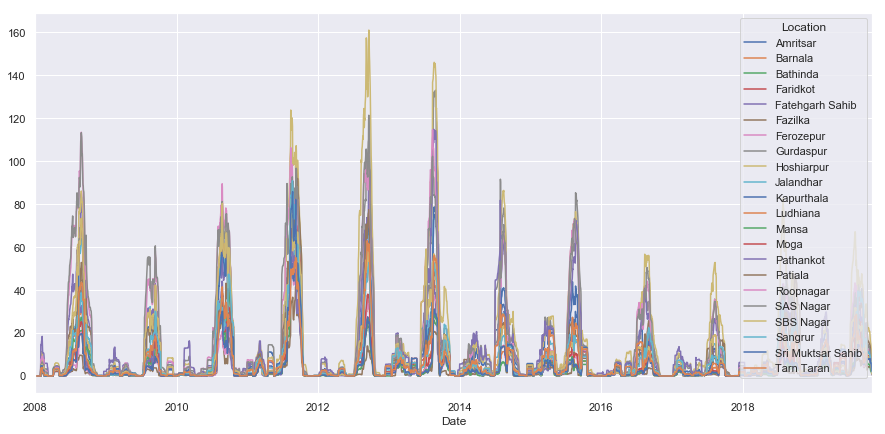

In [25]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
weather_lite.groupby(['Date','Location']).sum()['Precip_30'].unstack().plot(ax=ax)

In [26]:
weather_lite['Year'] = weather_lite['Date'].dt.year
weather_lite['Month'] = weather_lite['Date'].dt.month

In [27]:
precip_monthly_index = weather_lite.groupby(['Location','Month'])['Precip'].mean()
runoff_monthly_index = weather_lite.groupby(['Location','Month'])['Runoff'].mean()

In [28]:
means = weather_lite.groupby(['Location','Month']).mean().reset_index()
means.shape

(264, 13)

In [29]:
weather_lite.head()

,Date,Location,Precip,Runoff,Precip_3,Precip_7,Precip_30,Precip_120,Runoff_3,Runoff_7,Runoff_30,Runoff_120,Year,Month
0,2008-01-01,Jalandhar,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,1
1,2008-01-01,Pathankot,0.0,0.03561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,1
2,2008-01-01,Gurdaspur,0.0,0.03749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,1
3,2008-01-01,Fazilka,0.0,0.00034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,1
4,2008-01-01,SAS Nagar,0.0,0.00804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,1


In [30]:
weather_lite = weather_lite.reset_index().merge(means, on = ['Month','Location'], how = "left", suffixes = ('','_monthlymean')).set_index('Date')

In [31]:
weather_lite.drop(columns = 'Year_monthlymean', inplace=True)

In [32]:
weather_lite.Location.unique()

array(['Jalandhar', 'Pathankot', 'Gurdaspur', 'Fazilka', 'SAS Nagar',
       'Roopnagar', 'Ferozepur', 'Amritsar', 'Sri Muktsar Sahib', 'Moga',
       'Sangrur', 'Bathinda', 'Tarn Taran', 'Kapurthala', 'Ludhiana',
       'Mansa', 'Hoshiarpur', 'Barnala', 'Faridkot', 'Fatehgarh Sahib',
       'SBS Nagar', 'Patiala'], dtype=object)

# Extreme Rainfall Events (Non-Monsoon)

## 150mm per day = extreme rainfall events https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6635486/
## Threshold taken at 50 mm per day

In [33]:
extreme = weather_lite[weather_lite['Precip'] > 5]

In [34]:
extreme.shape

(699, 24)

In [35]:
non_monsoon = extreme[(extreme['Month'] != 6) & (extreme['Month'] != 7) & (extreme['Month'] != 8) & (extreme['Month'] != 9)]

# Monsoon Season (June, July, August, September)

In [36]:
# Import Normal Monsoon Season Rainfall csv 
#from https://web.archive.org/web/20101224191959/http://imd.gov.in/section/nhac/dynamic/Monsoon_frame.htm (Normal Rainfall Map)
#Note: missing Pathankot was imputed from adjacent Gurdaspur
#Note missing Fazilka was imputed from adjacent Sri Muktsar Sahib

monsoon = pd.read_csv('./cleaned_weatherdata/Monsoon.csv')

In [37]:
monsoon['Location'].unique()

array(['Amritsar', 'Barnala', 'Bathinda', 'Faridkot', 'Fatehgarh Sahib',
       'Fazilka', 'Ferozepur', 'Gurdaspur', 'Hoshiarpur', 'Jalandhar',
       'Kapurthala', 'Ludhiana', 'Moga', 'Pathankot', 'Patiala',
       'Roopnagar', 'Sangrur', 'SAS Nagar', 'SBS Nagar',
       'Sri Muktsar Sahib', 'Tarn Taran', 'Mansa'], dtype=object)

In [38]:
# Pulling out June, July, August, September months
monsoon_weather = weather_lite[(weather_lite['Month'] == 8) | (weather_lite['Month'] == 7) | (weather_lite['Month'] == 6) | (weather_lite['Month'] == 9)]

In [39]:
monsoon_weather.shape

(32208, 24)

In [40]:
#Combining with average monsoon data
monsoon_weather = monsoon_weather.reset_index().merge(monsoon, on = ['Month','Location'], how = "left").set_index('Date')

In [41]:
#Finding days that exceed 10% of the monsoon monthly average
monsoon_10percent = monsoon_weather[monsoon_weather['Precip'] / monsoon_weather['Monsoon_Avg'] > 0.1]

In [42]:
#Combining Monsoon exceeding 10% of the monthly average and Non-Monsoon flood dates together
flood_dates = pd.concat([monsoon_10percent, non_monsoon], sort=True)

In [43]:
flood_dates.shape

(4018, 33)

In [44]:
flood_dates.Location.unique()

array(['SAS Nagar', 'Fatehgarh Sahib', 'Roopnagar', 'Jalandhar',
       'Ludhiana', 'Hoshiarpur', 'SBS Nagar', 'Kapurthala', 'Patiala',
       'Sangrur', 'Fazilka', 'Ferozepur', 'Barnala', 'Tarn Taran',
       'Pathankot', 'Gurdaspur', 'Sri Muktsar Sahib', 'Moga', 'Amritsar',
       'Bathinda', 'Mansa', 'Faridkot'], dtype=object)

In [45]:
#Exporting dates to CSV
flood_dates.to_csv(path_or_buf = 'flood_dates.csv', index=True)

In [46]:
non_monsoon

,index,Location,Precip,Runoff,Precip_3,Precip_7,Precip_30,Precip_120,Runoff_3,Runoff_7,...,Precip_monthlymean,Runoff_monthlymean,Precip_3_monthlymean,Precip_7_monthlymean,Precip_30_monthlymean,Precip_120_monthlymean,Runoff_3_monthlymean,Runoff_7_monthlymean,Runoff_30_monthlymean,Runoff_120_monthlymean
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-08,173,Pathankot,5.398,1.32312,5.51000,5.55154,NaN,NaN,1.392450e+00,1.527860e+00,...,0.184922,0.090832,0.567980,1.338672,3.882848,13.605250,0.269211,0.607496,2.255800,37.280360
2009-01-18,8447,Pathankot,5.057,1.20554,5.09900,5.11400,7.80008,9.46348,1.328970e+00,1.568690e+00,...,0.184922,0.090832,0.567980,1.338672,3.882848,13.605250,0.269211,0.607496,2.255800,37.280360
2009-02-10,8933,Gurdaspur,5.856,0.72120,5.85854,6.18054,10.24516,13.06386,8.469000e-01,1.113490e+00,...,0.282964,0.174989,0.840040,1.918275,6.900372,12.465763,0.512792,1.145636,3.222099,10.114098
2009-02-10,8946,Pathankot,5.002,0.93910,5.02400,6.20700,12.46608,16.15248,1.040700e+00,1.410050e+00,...,0.335122,0.495503,1.001743,2.309409,8.571449,15.088524,1.450025,3.195960,7.935704,16.311046
2010-02-08,16928,Pathankot,7.330,2.55400,9.34300,9.65600,10.34462,17.32394,2.783200e+00,2.880300e+00,...,0.335122,0.495503,1.001743,2.309409,8.571449,15.088524,1.450025,3.195960,7.935704,16.311046
2011-02-07,24944,Pathankot,5.024,3.05070,5.02400,5.02400,6.41862,15.07440,3.068500e+00,3.164700e+00,...,0.335122,0.495503,1.001743,2.309409,8.571449,15.088524,1.450025,3.195960,7.935704,16.311046
2011-04-17,26449,Gurdaspur,9.197,26.71170,10.22400,10.65000,11.51900,31.07708,2.689040e+01,2.689040e+01,...,0.187385,0.234371,0.570613,1.402011,5.861673,24.318409,0.707676,1.666144,6.065835,18.747412
2013-01-17,40558,Fatehgarh Sahib,5.478,5.22560,5.47800,5.47800,5.47800,7.19270,5.227900e+00,5.231300e+00,...,0.087541,0.059164,0.269293,0.641410,1.518530,9.627026,0.180016,0.424897,0.925758,18.470964
2013-01-17,40561,Sangrur,5.673,6.01770,5.67300,5.67554,5.67554,7.54048,6.018500e+00,6.020100e+00,...,0.094034,0.062519,0.283421,0.664850,1.501065,9.492032,0.187623,0.433755,0.866221,10.595653


In [ ]:
#Combined min / max flood dates into ranges in CSV file upon export